# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

### modules import


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터셋 로드

In [2]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

### 데이터 확인

In [3]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (60000, 28, 28)	레이블: (60000,)
학습 데이터: (42000, 28, 28)	레이블: (42000,)
학습 데이터: (18000, 28, 28)	레이블: (18000,)
학습 데이터: (10000, 28, 28)	레이블: (10000,)


In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
class_names[y_train[0]]

'Pullover'

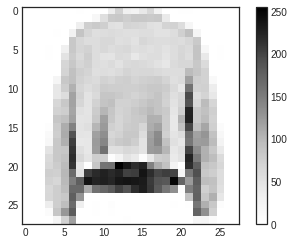

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

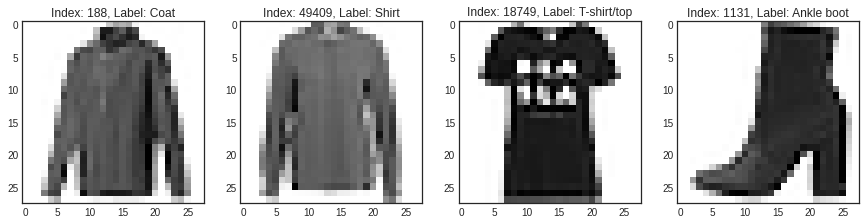

In [7]:
num_samle = 4

random_idxs = np.random.randint(60000, size=num_samle)

plt.figure(figsize=(15,10))
for i, idx in enumerate(random_idxs):
  image = x_train_full[idx,:]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs),i+1)
  plt.imshow(image)
  plt.title('Index: {}, Label: {}'.format(idx,class_names[label]))

### 데이터 전처리
- Normalization

- flatten

- oss='sparse_categorical_crossentropy'

In [8]:
x_train = (x_train.reshape(-1, 28*28)) / 255.
x_val = (x_val.reshape(-1, 28*28)) / 255.
x_test = (x_test.reshape(-1, 28*28)) / 255.

### 모델 구성 (함수형 API)

In [9]:
input = Input(shape=(784,), name='input')
hidden1 = Dense(256, activation='relu', name='hidden1')(input)
hidden2 = Dense(128, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(64, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(32, activation='relu', name='hidden4')(hidden3)
output = Dense(10, activation='softmax', name='ouput')(hidden4)

model = Model(inputs=[input], outputs=output)

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
hidden2 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden4 (Dense)              (None, 32)                2080      
_________________________________________________________________
ouput (Dense)                (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
________________________________________________

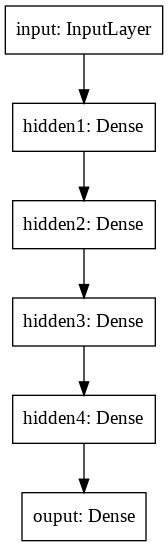

In [11]:
plot_model(model)

### 모델 컴파일

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=.01),
              metrics=['acc'])

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [13]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data = (x_val, y_val))

Epoch 1/10
329/329 [==============================] - 2s 7ms/step - loss: 0.9630 - acc: 0.7041 - val_loss: 0.7196 - val_acc: 0.7564
Epoch 2/10
329/329 [==============================] - 2s 6ms/step - loss: 0.5254 - acc: 0.8126 - val_loss: 0.5110 - val_acc: 0.8238
Epoch 3/10
329/329 [==============================] - 2s 6ms/step - loss: 0.4800 - acc: 0.8305 - val_loss: 0.5119 - val_acc: 0.8336
Epoch 4/10
329/329 [==============================] - 2s 6ms/step - loss: 0.4649 - acc: 0.8412 - val_loss: 0.6431 - val_acc: 0.7738
Epoch 5/10
329/329 [==============================] - 2s 6ms/step - loss: 0.4472 - acc: 0.8475 - val_loss: 0.5139 - val_acc: 0.8380
Epoch 6/10
329/329 [==============================] - 2s 6ms/step - loss: 0.4569 - acc: 0.8446 - val_loss: 0.5275 - val_acc: 0.7978
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.4402 - acc: 0.8514 - val_loss: 0.7011 - val_acc: 0.7235
Epoch 8/10
329/329 [==============================] - 2s 6ms/step - loss: 0.

### 학습 결과 시각화

In [14]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

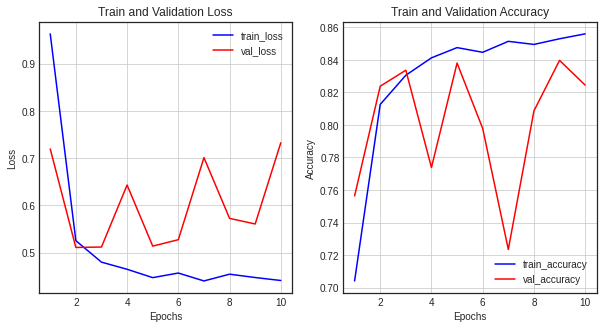

In [15]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss) + 1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss, color='blue',label='train_loss')
ax1.plot(epochs,val_loss, color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc, color='blue',label='train_accuracy')
ax2.plot(epochs,val_acc, color='red',label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 다른 옵티마이저로 실행
- 아래의 과정 다시 실행
  - 데이터셋 로드
  - 데이터 전처리
  - 모델 구성


In [17]:
from tensorflow.keras.optimizers import SGD

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(learning_rate=.01),
              metrics=['acc'])

In [19]:
history2 = model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=128,
                     validation_data = (x_val, y_val))

Epoch 1/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3580 - acc: 0.8756 - val_loss: 0.4813 - val_acc: 0.8619
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3333 - acc: 0.8792 - val_loss: 0.4752 - val_acc: 0.8636
Epoch 3/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3274 - acc: 0.8806 - val_loss: 0.4431 - val_acc: 0.8688
Epoch 4/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3238 - acc: 0.8824 - val_loss: 0.4481 - val_acc: 0.8703
Epoch 5/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3199 - acc: 0.8817 - val_loss: 0.4457 - val_acc: 0.8699
Epoch 6/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3177 - acc: 0.8821 - val_loss: 0.4419 - val_acc: 0.8696
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3175 - acc: 0.8830 - val_loss: 0.5287 - val_acc: 0.8518
Epoch 8/10
329/329 [==============================] - 2s 6ms/step - loss: 0.

In [20]:
history2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

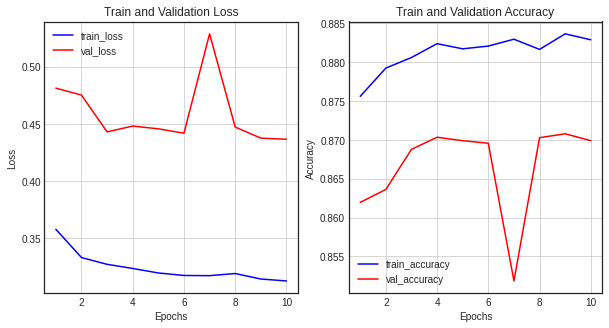

In [21]:
history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss) + 1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss, color='blue',label='train_loss')
ax1.plot(epochs,val_loss, color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc, color='blue',label='train_accuracy')
ax2.plot(epochs,val_acc, color='red',label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 (1)
- optimizer: SGD()로 학습한 모델

- evaluate

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4659 - acc: 0.8600


[0.4658561050891876, 0.8600000143051147]

### 학습된 모델을 통해 값 예측

In [23]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision=7)
print(pred_ys[0])

(10000, 10)
[7.4952939e-22 1.4380392e-25 7.0377656e-30 1.4625516e-19 3.0450351e-19
 7.0828185e-03 1.0676532e-18 3.7526470e-02 6.8990889e-11 9.5539075e-01]


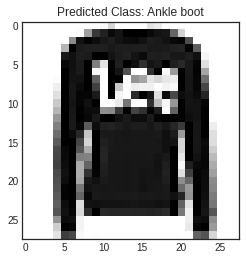

In [25]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[1].reshape(-1,28))
plt.title('Predicted Class: {}'.format(class_names[arg_pred_y[0]]))
plt.show()

In [33]:
def plot_image(i , pred_ys, y_test, img):
  pred_ys, y_test, img = pred_ys[i], y_test[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_ys)
  if predicted_label == y_test:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]),
                                       color=color)
  
def plot_value_array(y, pred_ys, true_label):
  pred_ys, true_label = pred_ys[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_ys, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(pred_ys)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

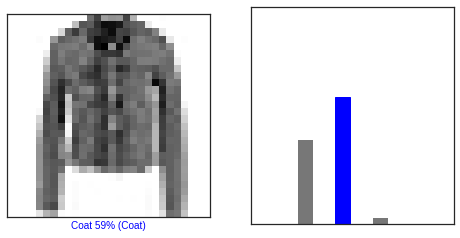

In [37]:
i = 10
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

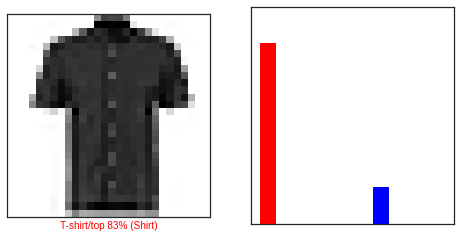

In [39]:
i = 40
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

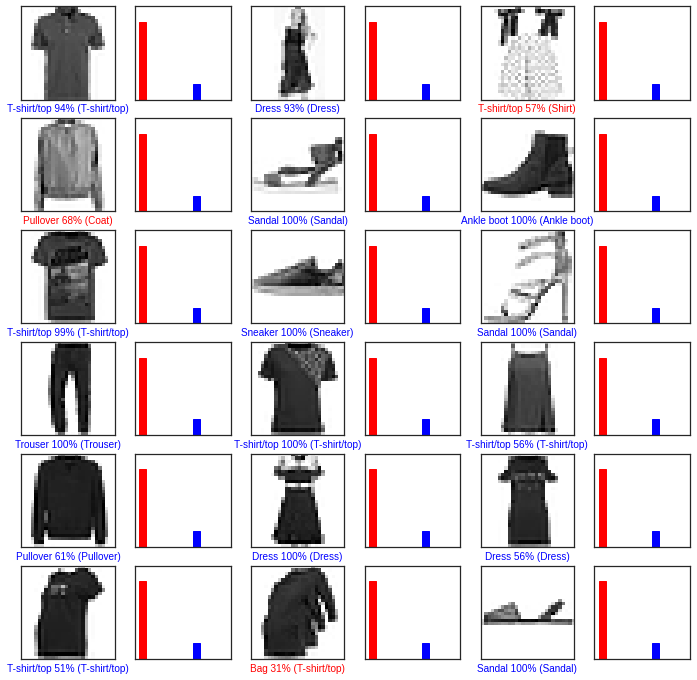

In [44]:
num_rows = 6
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for idx, num in enumerate(random_num):
  plt.subplot(num_rows, 2*num_cols, 2*idx+1)
  plot_image(num, pred_ys, y_test, x_test.reshape(-1,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*idx+2)
  plot_value_array(num, pred_ys, y_test)

plt.show()

### 모델 평가(2)
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

from tensorflow.keras.utils import to_categorical

In [47]:
y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

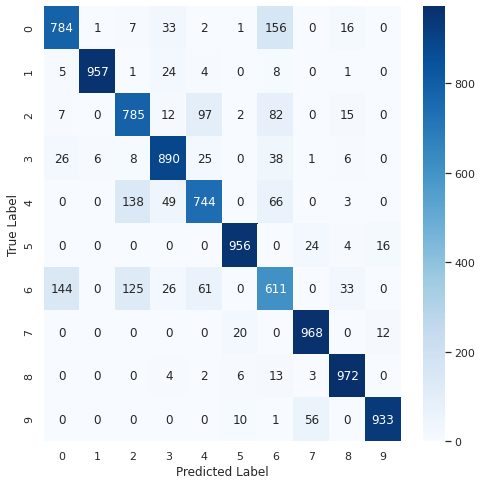

In [48]:
plt.figure(figsize=(8,8))
cm2 = confusion_matrix(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 모델 평가 (3)
- optimizer: SGD()로 설정한 모델

- 분류 보고서

In [49]:
print(classification_report(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.74      0.79      0.76      1000
           3       0.86      0.89      0.87      1000
           4       0.80      0.74      0.77      1000
           5       0.96      0.96      0.96      1000
           6       0.63      0.61      0.62      1000
           7       0.92      0.97      0.94      1000
           8       0.93      0.97      0.95      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

